# Modelos Matemáticos na Partilha

Os modelos matemáticos de partilha são utilizados para dividir recursos ou bens de forma justa entre várias partes. Pretendem garantir que cada parte recebe uma porção proporcional ao seu direito ou contribuição.

**Aplicações**

Esses modelos são aplicados em diversos contextos:

- **Eleições:** Para converter votos em mandatos de forma proporcional.
- **Alocação de Fundos:** Para distribuir recursos financeiros entre diferentes departamentos ou projetos.
- **Divisão de Bens:** Em contextos legais, como heranças ou dissoluções de sociedades.


**Princípios Fundamentais**

- **Princípio da Quota:** Garante que cada parte recebe uma quantidade de recursos dentro de um intervalo específico, baseado na sua proporção de votos ou direitos.

**Como Funciona:**

**Quota Inferior:** Cada parte deve receber pelo menos a parte inteira da sua quota.

**Quota Superior:** Nenhuma parte deve receber mais do que a parte inteira da sua quota mais um.

**Exemplo:** Se um partido tem direito a 2,4 assentos, ele deve receber pelo menos 2 assentos (quota inferior) e no máximo 3 assentos (quota superior).
  
- **Princípio da Monotonia:** Garante que, se a quantidade total de recursos aumenta, nenhuma parte deve receber menos recursos do que antes. Do mesmo modo, se a quantidade total de recursos diminui, nenhuma parte deve receber mais recursos do que anteriormente.

**Como Funciona:**

**Monotonia Positiva:** Se o número total de recursos aumenta, a alocação de cada parte não deve diminuir.

**Monotonia Negativa:** Se o número total de recursos diminui, a alocação de cada parte não deve aumentar.

**Exemplo:** Se um partido inicialmente recebe 3 mandatos com 100 mandatos totais, e o número total de mandatos aumenta para 110, o partido não deve receber menos de 3 mandatos.

## Métodos de partilha proporcional

## Sistemas de distribuição de mandatos

### Método de Hondt

O método de Hondt é um sistema de representação proporcional usado para atribuir mandatos em assembleias legislativas.

**Exemplo**

In [1]:
def metodo_hondt(votos, lugares):
    partidos = list(votos.keys())
    distribuicao = {partido: 0 for partido in partidos}
    
    for _ in range(lugares):
        quocientes = {partido: votos[partido] / (distribuicao[partido] + 1) for partido in partidos}
        vencedor = max(quocientes, key=quocientes.get)
        distribuicao[vencedor] += 1
    
    return distribuicao

votos = {'Partido A': 100000, 'Partido B': 80000, 'Partido C': 30000, 'Partido D': 20000}
lugares = 10
resultado = metodo_hondt(votos, lugares)
print("Distribuição de lugares pelo método de Hondt:")
for partido, num_lugares in resultado.items():
    print(f"{partido}: {num_lugares} lugares")

Distribuição de lugares pelo método de Hondt:
Partido A: 5 lugares
Partido B: 4 lugares
Partido C: 1 lugares
Partido D: 0 lugares


### Método de Sainte-Laguë

O método de Sainte-Laguë é outra forma de distribuição proporcional de assentos, que tende a favorecer partidos menores em comparação com o método de Hondt.

**Exemplo**

In [2]:
def metodo_sainte_lague(votos, lugares):
    partidos = list(votos.keys())
    distribuicao = {partido: 0 for partido in partidos}
    
    for _ in range(lugares):
        quocientes = {partido: votos[partido] / (2 * distribuicao[partido] + 1) for partido in partidos}
        vencedor = max(quocientes, key=quocientes.get)
        distribuicao[vencedor] += 1
    
    return distribuicao

# Exemplo

votos = {'Partido A': 100000, 'Partido B': 80000, 'Partido C': 30000, 'Partido D': 20000}
lugares = 10
resultado = metodo_sainte_lague(votos, lugares)
print("\nDistribuição de lugares pelo método de Sainte-Laguë:")
for partido, num_lugares in resultado.items():
    print(f"{partido}: {num_lugares} lugares")


Distribuição de lugares pelo método de Sainte-Laguë:
Partido A: 4 lugares
Partido B: 4 lugares
Partido C: 1 lugares
Partido D: 1 lugares


### Visualização da comparação entre os dois métodos

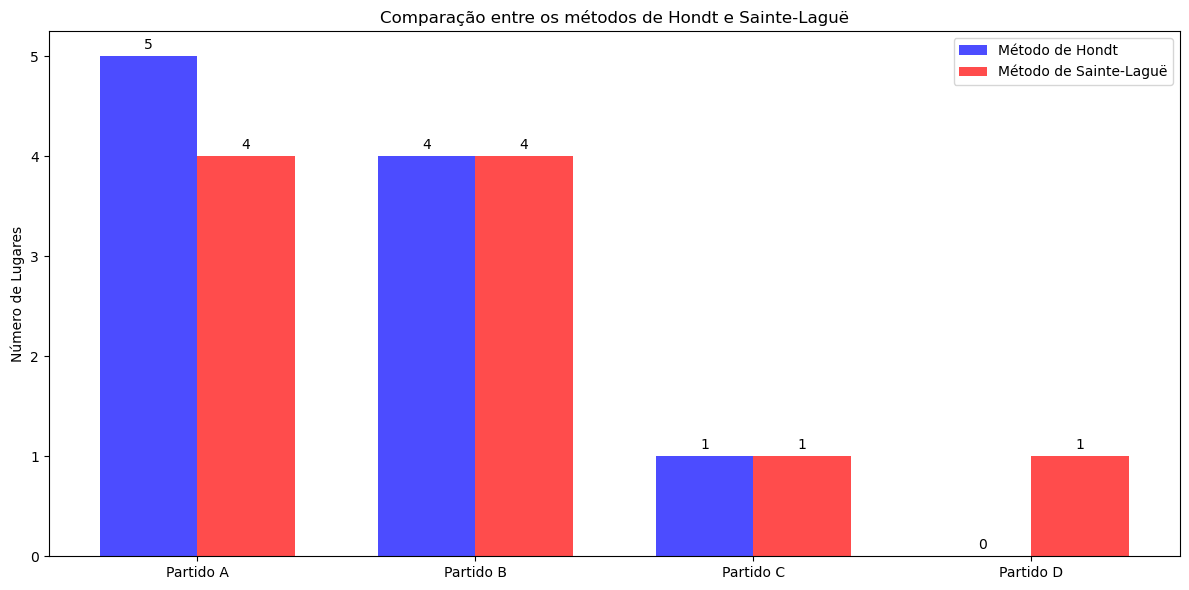

Distribuição de lugares pelo método de Hondt:
Partido A: 5 lugares
Partido B: 4 lugares
Partido C: 1 lugares
Partido D: 0 lugares

Distribuição de lugares pelo método de Sainte-Laguë:
Partido A: 4 lugares
Partido B: 4 lugares
Partido C: 1 lugares
Partido D: 1 lugares


In [3]:
import matplotlib.pyplot as plt

def metodo_hondt(votos, lugares):
    partidos = list(votos.keys())
    distribuicao = {partido: 0 for partido in partidos}
    
    for _ in range(lugares):
        quocientes = {partido: votos[partido] / (distribuicao[partido] + 1) for partido in partidos}
        vencedor = max(quocientes, key=quocientes.get)
        distribuicao[vencedor] += 1
    
    return distribuicao

def metodo_sainte_lague(votos, lugares):
    partidos = list(votos.keys())
    distribuicao = {partido: 0 for partido in partidos}
    
    for _ in range(lugares):
        quocientes = {partido: votos[partido] / (2 * distribuicao[partido] + 1) for partido in partidos}
        vencedor = max(quocientes, key=quocientes.get)
        distribuicao[vencedor] += 1
    
    return distribuicao

def comparar_metodos(votos, lugares):
    resultado_hondt = metodo_hondt(votos, lugares)
    resultado_sainte_lague = metodo_sainte_lague(votos, lugares)

    partidos = list(votos.keys())
    lugares_hondt = [resultado_hondt[partido] for partido in partidos]
    lugares_sainte_lague = [resultado_sainte_lague[partido] for partido in partidos]

    x = range(len(partidos))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar([i - width/2 for i in x], lugares_hondt, width, label='Método de Hondt', color='blue', alpha=0.7)
    rects2 = ax.bar([i + width/2 for i in x], lugares_sainte_lague, width, label='Método de Sainte-Laguë', color='red', alpha=0.7)

    ax.set_ylabel('Número de Lugares')
    ax.set_title('Comparação entre os métodos de Hondt e Sainte-Laguë')
    ax.set_xticks(x)
    ax.set_xticklabels(partidos)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()

    print("Distribuição de lugares pelo método de Hondt:")
    for partido, num_lugares in resultado_hondt.items():
        print(f"{partido}: {num_lugares} lugares")

    print("\nDistribuição de lugares pelo método de Sainte-Laguë:")
    for partido, num_lugares in resultado_sainte_lague.items():
        print(f"{partido}: {num_lugares} lugares")

# Exemplo de uso

votos = {'Partido A': 100000, 'Partido B': 80000, 'Partido C': 30000, 'Partido D': 20000}
lugares = 10
comparar_metodos(votos, lugares)

## Análise e Comparação de Sistemas Eleitorais

Nesta seção, vamos analisar e comparar diferentes sistemas eleitorais, destacando suas vantagens e desvantagens.

Após executar o código, poderá observar:

- Um resumo textual dos resultados para cada sistema eleitoral.
- Dois gráficos de barras comparando os sistemas: (Frequência do vencedor por sistema; Frequência de segunda volta por sistema (será zero para Maioria Simples e Método de Borda))

Os parâmetros (número de simulações, eleitores e candidatos) podem ser ajustados para explorar diferentes cenários.

Algumas sugestões para discussão com os alunos:

Comparar como a frequência do vencedor varia entre os sistemas.
Analisar a frequência de segunda volta no sistema de Maioria Absoluta e discutir suas implicações.
Discutir como o Método de Borda leva em conta as preferências completas dos eleitores, em contraste com os outros métodos.
Explorar como os resultados mudam ao variar o número de candidatos ou eleitores.

Este código fornece uma base sólida para explorar e comparar esses três sistemas eleitorais de forma visual e quantitativa.


Resultados das simulações (10000 simulações, 1000 eleitores, 5 candidatos):

Maioria_simples:
  Vencedor mais frequente: Candidato 5
  Frequência do vencedor: 20.34%

Maioria_absoluta:
  Vencedor mais frequente: Não determinado
  Frequência do vencedor: 0.00%
  Frequência de segunda volta: 100.00%

Borda:
  Vencedor mais frequente: Candidato 2
  Frequência do vencedor: 20.63%


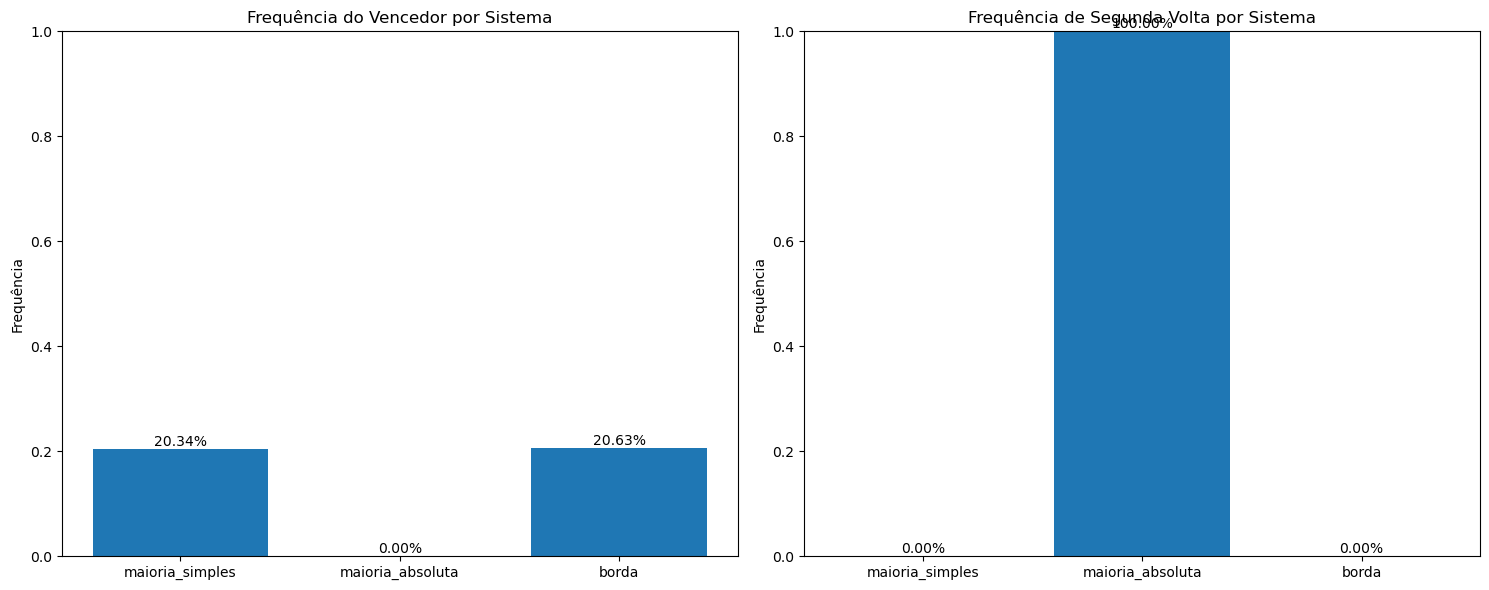

In [4]:
import random
import matplotlib.pyplot as plt
from collections import Counter

def simular_eleicao(num_eleitores, num_candidatos, sistema_eleitoral):
    if sistema_eleitoral in ['maioria_simples', 'maioria_absoluta']:
        votos = [random.randint(1, num_candidatos) for _ in range(num_eleitores)]
        contagem = Counter(votos)
        
        if sistema_eleitoral == 'maioria_simples':
            return max(contagem, key=contagem.get)
        elif sistema_eleitoral == 'maioria_absoluta':
            if max(contagem.values()) > num_eleitores / 2:
                return max(contagem, key=contagem.get)
            else:
                return 'Segunda Volta'
    elif sistema_eleitoral == 'borda':
        votos = [random.sample(range(1, num_candidatos + 1), num_candidatos) for _ in range(num_eleitores)]
        pontuacao = {i: 0 for i in range(1, num_candidatos + 1)}
        for voto in votos:
            for posicao, candidato in enumerate(voto):
                pontuacao[candidato] += num_candidatos - posicao
        return max(pontuacao, key=pontuacao.get)
    else:
        return 'Sistema não reconhecido'

def executar_simulacoes(num_simulacoes, num_eleitores, num_candidatos):
    sistemas = ['maioria_simples', 'maioria_absoluta', 'borda']
    resultados = {sistema: [] for sistema in sistemas}
    
    for _ in range(num_simulacoes):
        for sistema in sistemas:
            resultados[sistema].append(simular_eleicao(num_eleitores, num_candidatos, sistema))
    
    return resultados

def analisar_resultados(resultados, num_simulacoes):
    analise = {}
    for sistema, res in resultados.items():
        contagem = Counter(res)
        segunda_volta_freq = contagem.get('Segunda Volta', 0) / num_simulacoes
        contagem.pop('Segunda Volta', None)
        
        if contagem:
            vencedor = max(contagem, key=contagem.get)
            freq_vencedor = contagem[vencedor] / num_simulacoes
        else:
            vencedor = 'Não determinado'
            freq_vencedor = 0
        
        analise[sistema] = {
            'vencedor': vencedor,
            'freq_vencedor': freq_vencedor,
            'segunda_volta_freq': segunda_volta_freq
        }
    return analise

def visualizar_resultados(analise):
    sistemas = list(analise.keys())
    freq_vencedor = [analise[s]['freq_vencedor'] for s in sistemas]
    segunda_volta_freq = [analise[s]['segunda_volta_freq'] for s in sistemas]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico de barras para frequência do vencedor
    ax1.bar(sistemas, freq_vencedor)
    ax1.set_title('Frequência do Vencedor por Sistema')
    ax1.set_ylabel('Frequência')
    ax1.set_ylim(0, 1)
    for i, v in enumerate(freq_vencedor):
        ax1.text(i, v, f'{v:.2%}', ha='center', va='bottom')

    # Gráfico de barras para frequência de segunda volta
    ax2.bar(sistemas, segunda_volta_freq)
    ax2.set_title('Frequência de Segunda Volta por Sistema')
    ax2.set_ylabel('Frequência')
    ax2.set_ylim(0, 1)
    for i, v in enumerate(segunda_volta_freq):
        ax2.text(i, v, f'{v:.2%}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Parâmetros da simulação
num_simulacoes = 10000
num_eleitores = 1000
num_candidatos = 5

# Executar simulações
resultados = executar_simulacoes(num_simulacoes, num_eleitores, num_candidatos)

# Analisar resultados
analise = analisar_resultados(resultados, num_simulacoes)

# Imprimir resultados
print(f"\nResultados das simulações ({num_simulacoes} simulações, {num_eleitores} eleitores, {num_candidatos} candidatos):")
for sistema, dados in analise.items():
    print(f"\n{sistema.capitalize()}:")
    print(f"  Vencedor mais frequente: {'Candidato ' + str(dados['vencedor']) if dados['vencedor'] != 'Não determinado' else dados['vencedor']}")
    print(f"  Frequência do vencedor: {dados['freq_vencedor']:.2%}")
    if sistema == 'maioria_absoluta':
        print(f"  Frequência de segunda volta: {dados['segunda_volta_freq']:.2%}")

# Visualizar resultados
visualizar_resultados(analise)

## Questões 

### Maioria Simples

Numa eleição com três candidatos, os votos são distribuídos da seguinte forma:

- A: 45 votos
- B: 30 votos
- C: 25 votos

Quem é o vencedor pela maioria simples?

```{dropdown} Clique para ver a resposta
**Resposta correta: A**

### Maioria Absoluta

Numa eleição com três candidatos, os votos são distribuídos da seguinte forma:

- A: 45 votos
- B: 30 votos
- C: 25 votos

Há um vencedor pela maioria absoluta?

```{dropdown} Clique para ver a resposta
**Resposta correta: NÃO**

### Métodos Eleitorais

Qual dos seguintes métodos eleitorais:

- Maioria Simples
- Maioria Absoluta
- Voto Aleatório
  
garante que o vencedor tenha mais de 50% dos votos?

```{dropdown} Clique para ver a resposta
**Resposta correta: MAIORIA ABSOLUTA**